<a href="https://colab.research.google.com/github/Biosticianenoch/Biosticianenoch/blob/main/Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Install required modules
!pip install pyjanitor
!pip install statsmodels
!pip install sklearn
!pip install joblib
!pip install google.colab
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 7.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00


In [28]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import janitor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.stats as stats


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
## Load the dataset
file_path = '/content/drive/My Drive/data_modeling.xlsx'
df = pd.read_excel(file_path).clean_names()

In [51]:
## View the first few rows of the dataset
df.head(10)

,customer_id,age,gender,annual_income,spending_score,transaction_amount,purchase_frequency,discount_applied,product_category
0,1001,56,Female,63088,24,241.05,3,1,Furniture
1,1002,69,Male,59811,81,276.18,7,1,Electronics
2,1003,46,Male,75479,74,88.03,14,1,Beauty
3,1004,32,Female,105392,30,109.81,7,1,Furniture
4,1005,60,Male,107369,59,54.67,5,0,Beauty
5,1006,25,Male,39963,87,85.29,5,0,Beauty
6,1007,38,Female,75123,96,232.31,2,0,Electronics
7,1008,56,Male,112705,81,269.87,6,0,Electronics
8,1009,36,Male,93477,81,18.75,15,1,Beauty
9,1010,40,Male,34388,14,400.43,10,0,Clothing


In [52]:
## Assess the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   age                 500 non-null    int64  
 2   gender              500 non-null    object 
 3   annual_income       500 non-null    int64  
 4   spending_score      500 non-null    int64  
 5   transaction_amount  500 non-null    float64
 6   purchase_frequency  500 non-null    int64  
 7   discount_applied    500 non-null    int64  
 8   product_category    500 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 35.3+ KB


In [53]:
## Check for missing values
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
annual_income,0
spending_score,0
transaction_amount,0
purchase_frequency,0
discount_applied,0
product_category,0


In [54]:
## Check for duplicates
df.duplicated().sum()

np.int64(0)

In [55]:
## Describe the dataset
df.describe()

,customer_id,age,annual_income,spending_score,transaction_amount,purchase_frequency,discount_applied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,44.220000,67149.874000,50.572000,252.036400,9.920000,0.470000
std,144.481833,15.036082,29581.152299,28.972532,133.898757,5.478835,0.499599
min,1001.000000,18.000000,20055.000000,1.000000,10.160000,1.000000,0.000000
25%,1125.750000,32.000000,39921.000000,25.000000,134.362500,5.000000,0.000000
50%,1250.500000,45.000000,65964.000000,49.000000,259.055000,10.000000,0.000000
75%,1375.250000,57.000000,93690.500000,76.000000,356.877500,15.000000,1.000000
max,1500.000000,69.000000,119929.000000,99.000000,497.790000,19.000000,1.000000


In [56]:
## Data Preprocessing
df = df.drop(columns=["customer_id"])
# Encode gender
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

1. What is the average annual income of customers in the dataset?

In [57]:
# Average annual income of customers
avg_annual_income = df['annual_income'].mean()

print('The average annual income is', avg_annual_income)

The average annual income is 67149.874


2. What is the distribution of spending scores among customers?

In [58]:
# Summary statistics of spending scores
df['spending_score'].describe()

,spending_score
count,500.000000
mean,50.572000
std,28.972532
min,1.000000
25%,25.000000
50%,49.000000
75%,76.000000
max,99.000000


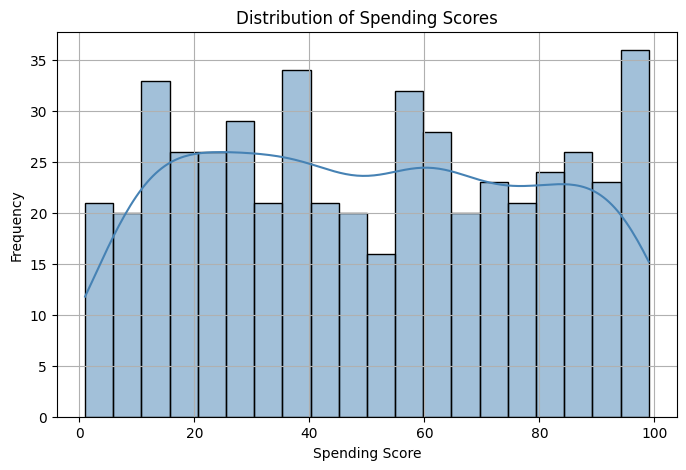

In [59]:
# Visualize the distribution
plt.figure(figsize=(8,5))
sns.histplot(df["spending_score"], bins=20, kde=True, color="steelblue")
plt.title("Distribution of Spending Scores")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

3. How many male and female customers are there in the dataset?

Text(0.5, 1.0, 'Gender Distribution')

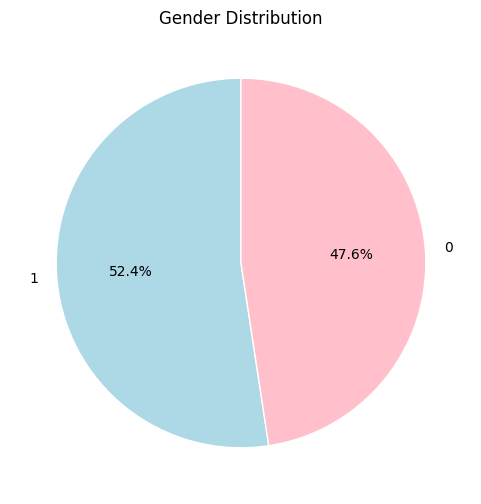

In [60]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Plot gender distribution pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['lightblue', 'pink'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Gender Distribution')

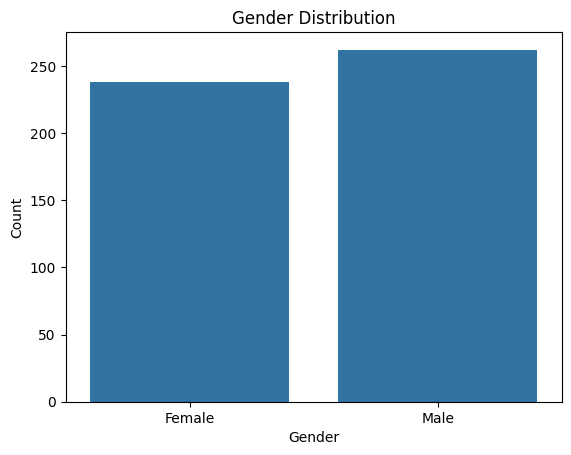

In [61]:
## Bar Chart
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([1, 0], labels = ['Male', 'Female'])
plt.show()

4. Which product category has the highest number of purchases?

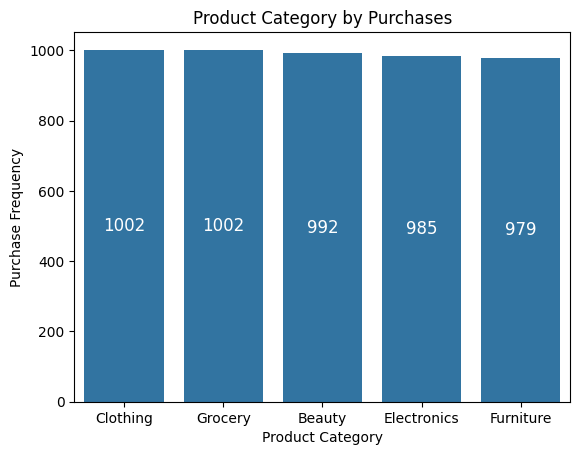

In [62]:
# Group by product_category and sum purchase_frequency
highest_purchase = (
    df.groupby("product_category")["purchase_frequency"]
    .sum()
    .reset_index()
    .sort_values(by="purchase_frequency", ascending=False)
)

# Plot the highest_purchase
sns.barplot(x = highest_purchase['product_category'], y = highest_purchase['purchase_frequency'])
plt.xlabel('Product Category')
plt.ylabel('Purchase Frequency')
plt.title('Product Category by Purchases')
for container in plt.gca().containers:
    plt.bar_label(container,
                  label_type='center',
                  color='white',
                  fontsize=12)

1. Can we predict the transaction amount based on age, income, and spending score?

In [63]:
## Label encode product category
le = LabelEncoder()
df['product_category'] = le.fit_transform(df['product_category'])
# Define features and target variable
X = df.drop(columns = ["transaction_amount"])
y = df['transaction_amount']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize
lm_model = LinearRegression()

# Train the model
lm_model.fit(X_train, y_train)

# Make predictions
y_pred = lm_model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print output
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"mae: {mae}")

## Feature importance
feature_importance = pd.DataFrame({"feature": X.columns, "importance": np.absolute(lm_model.coef_)})
print(feature_importance)

RMSE: 134.0838144335088
R2: -0.013738280426859761
mae: 113.00316084163688
              feature  importance
0                 age    0.709542
1              gender   21.853796
2       annual_income    0.000195
3      spending_score    0.320695
4  purchase_frequency    1.338135
5    discount_applied   14.423798
6    product_category    0.093969


Text(0.5, 1.0, 'Feature Importance')

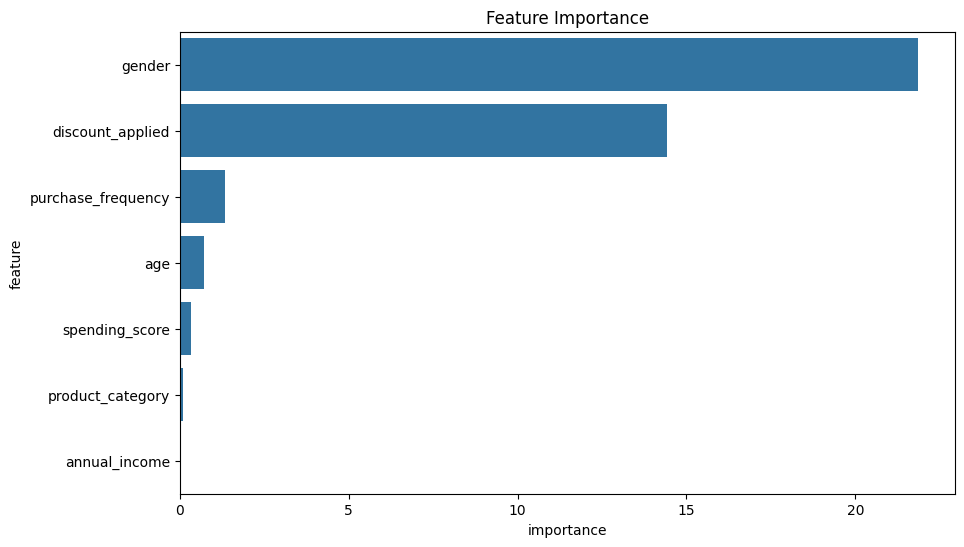

In [64]:
## Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False))
plt.title("Feature Importance")

In [65]:
## Model summary using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     transaction_amount   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.476
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.174
Time:                        18:59:07   Log-Likelihood:                -3152.3
No. Observations:                 500   AIC:                             6321.
Df Residuals:                     492   BIC:                             6354.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                299.3211     29

6. How does annual income affect purchase frequency?

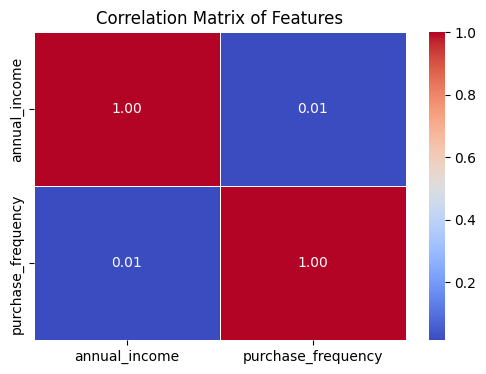

In [66]:
# Compute correlation matrix
corr_matrix = df[['annual_income', 'purchase_frequency']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

There is a weak positive correlation (0.01) between annual_income and purchase_frequency. This means that as annual income changes it does not affect the purchase frequency.

In [67]:
# Assuming X and y are our variables
X = df[['annual_income']].values  # Reshaping needed for sklearn
y = df['purchase_frequency'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Employ a linear regression model to model the relationship
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1001
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.752
Time:                        18:59:19   Log-Likelihood:                -1559.4
No. Observations:                 500   AIC:                             3123.
Df Residuals:                     498   BIC:                             3131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7437      0.609     16.004      0.0

There is no relationship between annual income and purchase frequency as indicated by the p_value > 0.05 from the linear regression model.

3. Is there a relationship between discount application and transaction amount?

In [68]:
# Generate summary statistics
df.groupby('discount_applied')['transaction_amount'].mean()

,transaction_amount
discount_applied,
0,257.520868
1,245.851787


The mean transaction amount for customers with no discount is 258 while the mean for customers with discount is 246.

T-Test to test for significant difference in means

In [69]:
## Split the data into two groups
discount_applied = df[df['discount_applied'] == 0]['transaction_amount']

discount_not_applied = df[df['discount_applied'] == 1]['transaction_amount']

## Perform t-test
t_stat, p_value = stats.ttest_ind(discount_applied, discount_not_applied, equal_var=False)

## Interpret the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 0.9721173434282206
P-Value: 0.3314717907935202


There is no statistically significant difference in mean of transaction amount across the customers with discounts and those without discounts. This suggests that there is no substantial connection between Discount allowed and Transaction amount.

Segmentation & Clustering:
1. Can we cluster customers based on spending behavior, income, and purchase frequency?

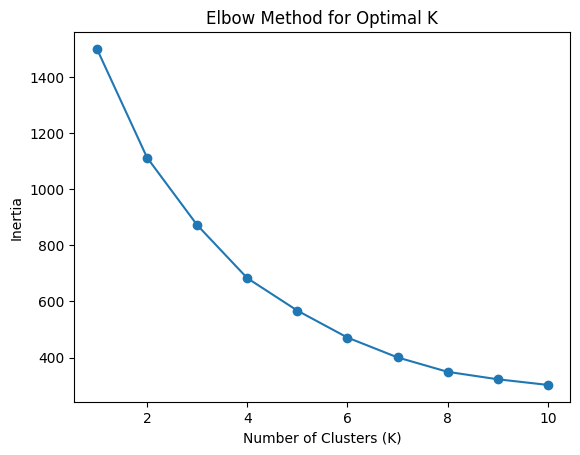

In [70]:
## Select the features
features = df[['spending_score', 'annual_income', 'purchase_frequency']]

## Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

## Plotting the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

K Means algorithm is used for partitioning a dataser into k clusters
Standardization ensures that the features are at the same scale, preventing certain features from dorminating the learning process and helping the algorithm converge faster.
Elbow mothod is performed to determine the optimal number of clusters.

From the elbow curve we can identify the optimal number of clusters is 4.

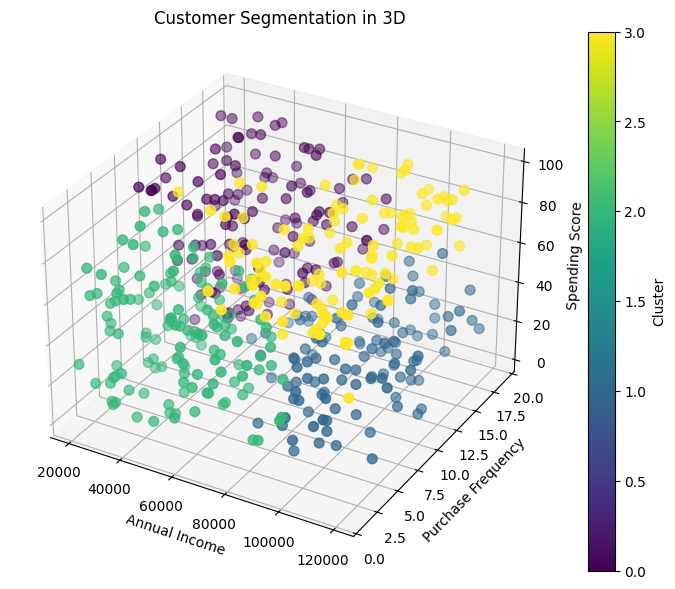

In [71]:
from mpl_toolkits.mplot3d import Axes3D

## Perform K-Means clustering with the optimal number of clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

## Visualize the clusters using 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['annual_income'], df['purchase_frequency'], df['spending_score'], c=df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Annual Income')
ax.set_ylabel('Purchase Frequency')
ax.set_zlabel('Spending Score')
ax.set_title('Customer Segmentation in 3D')

plt.colorbar(scatter, label="Cluster")
plt.show()

In [72]:
# Check the distribution of each cluster by summarizing their key statistics
cluster_summary = df.groupby('Cluster')[['annual_income','purchase_frequency', 'spending_score']].mean()

cluster_summary

,annual_income,purchase_frequency,spending_score
Cluster,,,
0,42792.053846,14.869231,58.392308
1,93939.818966,11.189655,23.681034
2,46780.215827,4.798561,40.949640
3,92282.617391,9.234783,80.486957


In [73]:
# Define quantile thresholds
income_bins = cluster_summary['annual_income'].quantile([0.33, 0.66]).values
spending_bins = cluster_summary['spending_score'].quantile([0.33, 0.66]).values
freq_bins = cluster_summary['purchase_frequency'].quantile([0.33, 0.66]).values

# Function to categorize values into Low, Medium, High
def categorize(value, bins):
    if value <= bins[0]:
        return 'Low'
    elif value <= bins[1]:
        return 'Medium'
    else:
        return 'High'

# Define label mapping
label_mapping = {
    ('Low', 'Low', 'Low'): 'Low Spender',
    ('Low', 'Medium', 'High'): 'Growing Potential',
    ('High', 'High', 'High'): 'Premium Customer'
}
# Apply categorization
cluster_summary['Income Level'] = cluster_summary['annual_income'].apply(lambda x: categorize(x, income_bins))
cluster_summary['Spending Score'] = cluster_summary['spending_score'].apply(lambda x: categorize(x, spending_bins))
cluster_summary['Purchase Frequency'] = cluster_summary['purchase_frequency'].apply(lambda x: categorize(x, freq_bins))

# Assign labels dynamically
cluster_summary['Possible Label'] = cluster_summary.apply(
    lambda row: label_mapping.get((row['Income Level'], row['Spending Score'], row['Purchase Frequency']), 'Other'),
    axis=1
)

# Final table with meaningful insights
cluster_summary = cluster_summary[['Income Level', 'Spending Score', 'Purchase Frequency', 'Possible Label']]

cluster_summary



,Income Level,Spending Score,Purchase Frequency,Possible Label
Cluster,,,,
0,Low,High,High,Other
1,High,Low,High,Other
2,Medium,Medium,Low,Other
3,High,High,Medium,Other


2. Do high-income customers tend to buy specific product categories more frequently?

In [74]:
# Calculate mean and standard deviation of income
mean_income = df['annual_income'].mean()
std_income = df['annual_income'].std()

# Ensure bins are monotonically increasing
min_income = df['annual_income'].min()  # Get the minimum income
lower_bin = max(0, mean_income - std_income)  # Ensure lower bin is at least 0
upper_bin = min(df['annual_income'].max(), mean_income + std_income)  # Ensure upper bin is at most max income

# Define income levels based on mean ± standard deviation
df['income_level'] = pd.cut(df['annual_income'],
                            bins=[min_income, lower_bin, upper_bin, df['annual_income'].max()],
                            labels=['Low', 'Medium', 'High'],
                            include_lowest=True,  # Include the minimum value in the first bin
                            duplicates='drop')  # Drop duplicate edges to avoid warnings

# Check results
df.groupby('income_level')['purchase_frequency'].mean()

,purchase_frequency
income_level,
Low,9.945946
Medium,9.783217
High,10.271845


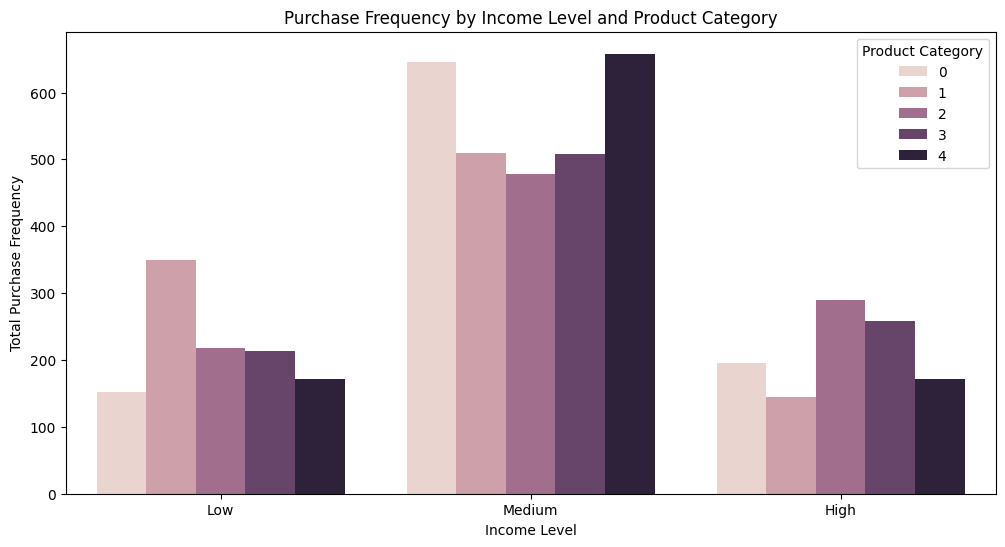

In [75]:
## Group by income_level and product_category to analyze purchase frequency:
income_purchase_freq = df.groupby(['income_level', 'product_category'])['purchase_frequency'].sum().reset_index()

## Visualize the Results
plt.figure(figsize=(12, 6))
sns.barplot(data=income_purchase_freq, x='income_level', y='purchase_frequency', hue='product_category')
plt.title('Purchase Frequency by Income Level and Product Category')
plt.xlabel('Income Level')
plt.ylabel('Total Purchase Frequency')
plt.legend(title="Product Category")
plt.show()

2. Which product category benefits the most from discount application?

In [76]:
# Group by product category and discount applied, then calculate total purchase frequency
discount_effect = df.groupby(['product_category', 'discount_applied'])['purchase_frequency'].sum().unstack()

discount_effect = discount_effect.rename(columns={0: 'No Discount', 1: 'Discount Applied'})

discount_effect.sort_values(by='Discount Applied', ascending=False)

discount_applied,No Discount,Discount Applied
product_category,,
1,515,487
0,521,471
4,533,469
3,555,424
2,568,417


3. What is the ideal spending score range for high-value customers?

In [77]:
# Filter high_value customers
high_value_customers = df[df['income_level'] == 'High']

# View descriptive statistics
high_value_customers['spending_score'].describe()

,spending_score
count,103.000000
mean,50.388350
std,30.187075
min,1.000000
25%,24.000000
50%,48.000000
75%,80.000000
max,99.000000
